<a href="https://colab.research.google.com/github/dhanushka365/Ensemble_Learner/blob/work/Simple_Ensemble_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

In [ ]:
data = load_iris()
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Convert the Numpy array into a dataframe

In [ ]:
d={
   'sepal length': data.data[50:,1], #get first 50 rows of first column
   'petal length': data.data[50:,2],
   'Species':np.array([i for i in data.target if i>0])
}

In [ ]:
df = pd.DataFrame(d)
df
#species 1 represent versicolor and 2 represent virginica

,sepal length,petal length,Species
0,3.2,4.7,1
1,3.2,4.5,1
2,3.1,4.9,1
3,2.3,4.0,1
4,2.8,4.6,1
...,...,...,...
95,3.0,5.2,2
96,2.5,5.0,2
97,3.0,5.2,2
98,3.4,5.4,2


In [12]:
#now will shuffe our data set

df = df.sample(df.shape[0])
df

,sepal length,petal length,Species
75,3.2,6.0,2
97,3.0,5.2,2
62,3.0,5.5,2
91,3.1,5.1,2
93,3.2,5.9,2
...,...,...,...
59,3.6,6.1,2
74,3.3,5.7,2
50,3.3,6.0,2
2,3.1,4.9,1


In [19]:
# 100 total data are there
# create data sets
df_train = df.iloc[:60, :].sample(10)
#df_train
df_test = df.iloc[61:,:].sample(10)
#df_test

In [32]:
df_tt = df_test.sample(5, replace =True)
X_test = df_tt.iloc[:,:-1].values
Y_test = df_tt.iloc[:,-1].values


In [39]:
#models --> Random Samples !

def evaluate(model, X,Y):
  model.fit(X,Y)
  plot_tree(model)

  plt.show()
  plot_decision_regions(X,Y ,model, legend=2)
  plt.show()

  Y_pred = model.predict(X_test)
  print("Y_test:" , Y_test)
  print("Y_pred:", Y_pred)

  print("accuracy score",accuracy_score(Y_test ,Y_pred)*100)





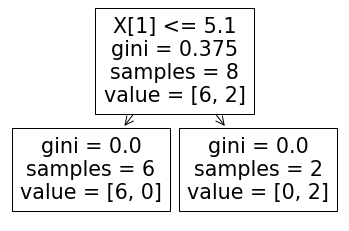

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


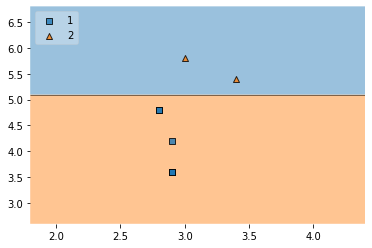

Y_test: [1 1 1 1 1]
Y_pred: [1 1 1 1 1]
accuracy score 100.0


In [52]:
#First desicion Tree
df_t = df_train.sample(8 , replace = True)
X_train = df_t.iloc[:, :-1].values
Y_train = df_t.iloc[:, -1].values
dt1 = DecisionTreeClassifier()
bag1 = evaluate(dt1 ,X_train ,Y_train)


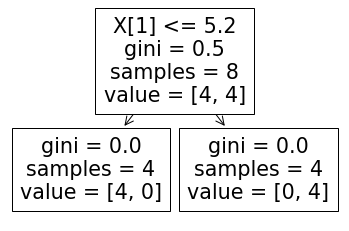

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


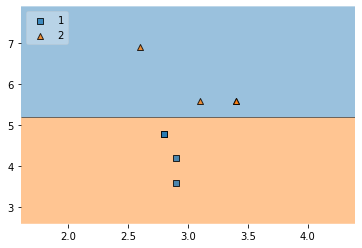

Y_test: [1 1 1 1 1]
Y_pred: [1 1 1 1 1]
accuracy score 100.0


In [53]:
#Second desicion Tree
df_t = df_train.sample(8 , replace = True)
X_train = df_t.iloc[:, :-1].values
Y_train = df_t.iloc[:, -1].values
dt2 = DecisionTreeClassifier()
bag2 = evaluate(dt2 ,X_train ,Y_train)


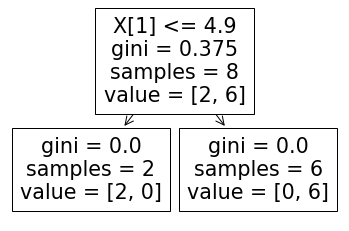

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


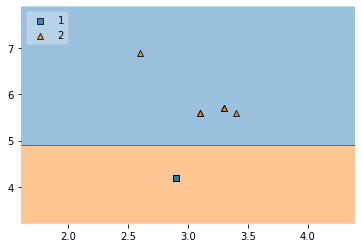

Y_test: [1 1 1 1 1]
Y_pred: [2 1 1 1 1]
accuracy score 80.0


In [54]:
#Third desicion Tree
df_t = df_train.sample(8 , replace = True)
X_train = df_t.iloc[:, :-1].values
Y_train = df_t.iloc[:, -1].values
dt3 = DecisionTreeClassifier()
bag3 = evaluate(dt3 ,X_train ,Y_train)


In [56]:
# Aggregation

print("Prediction 1", bag1.predict(np.array([2.5,4.9]).reshape(1,2)))
print("Prediction 2", bag2.predict(np.array([2.5,4.9]).reshape(1,2)))
print("Prediction 3", bag3.predict(np.array([2.5,4.9]).reshape(1,2)))


AttributeError: ignored